In [1]:
from Header import *
%matplotlib inline

# Data exploration

In [2]:
df = pd.read_excel("../sentences_with_sentiment.xlsx")

In [3]:
df = df.drop_duplicates(subset=['Sentence','Positive', 'Negative', 'Neutral'])

In [4]:
df.head()

,ID,Sentence,Positive,Negative,Neutral
0,1,The results in 2nd line treatment show an ORR ...,1,0,0
1,2,The long duration of response and high durable...,1,0,0
2,3,The median OS time in the updated results exce...,0,0,1
3,4,"Therefore, the clinical benefit in 2nd line tr...",1,0,0
4,5,"The data provided in 1st line, although prelim...",1,0,0


In [5]:
print("Total number of rows:", len(df.index))

Total number of rows: 236


In [6]:
df[['Positive', 'Negative', 'Neutral']].sum(axis=0)

Positive    140
Negative     32
Neutral      64
dtype: int64

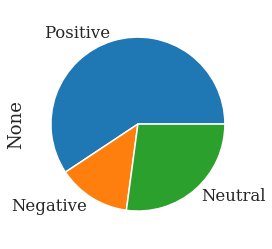

In [7]:
df[['Positive', 'Negative', 'Neutral']].sum(axis=0).plot.pie()

Unbalanced data, especially small number of negative values.<br>
In general small amount of data, I guess not enough for Deep Neural Networks.
Classifier with small number of features might work.

In [8]:
df[['Positive', 'Negative', 'Neutral']].sum(axis=1).max()

1

No sentence has more than one category.

In [9]:
print("Positive sentences:")
for i,s in enumerate(df[df.Positive==1].Sentence):
    print(str(i)+'.', s)

Positive sentences:
0. The results in 2nd line treatment show an ORR of 33% with some patients having durable responses resulting in an apparent PFS plateau
1. The long duration of response and high durable response rate observed after 6-month minimum follow-up is further substantiated by the 12-months minimum follow-up analysis
2. Therefore, the clinical benefit in 2nd line treatment is considered clinically meaningful and the magnitude of the effect is significant compared to chemotherapy
3. The data provided in 1st line, although preliminary, showed activity of avelumab in mMCC in terms of response rate, and evidence of a similar durable response from the small subset of patients with a longer follow-up compared to 2nd line treatment
4. Taking into account the intrinsic limitation of single arm studies, the rarity of the disease and the challenges to compare the results with data from historical controls and in the literature, the currently available data are deemed to support the e

58. The overall safety profile of lenvatinib-everolimus combination is consistent with known safety profiles of its components observed either in other indications (for lenvatinib) or in the intended indication (for everolimus).
59. The reported toxicity was in general predictable and manageable.
60. No new safety signal has been reported.
61. However, most of these adverse events were well managed by dose reduction, interruption or by additional medical treatment.
62. Based on the available data, the CHMP considered that all criteria for a BCS-based biowaiver were met. 
63. Therefore the absence of a bioequivalence study was considered justified and the CHMP concluded that no clinical data were needed to support the application for Lacosamide Accord 50 mg, 100 mg, 150 mg and 200 mg film-coated tablets as a generic medicinal product to Vimpat.
64. Overall, the available clinical efficacy data were considered adequate to support the use of cladribine in the treatment of adult patients w

In [10]:
print("Negative sentences:")
for i,s in enumerate(df[df.Negative==1].Sentence):
    print(str(i)+'.', s)

Negative sentences:
0. This means that further evidence on this medicinal product is awaited
1. The CHMP considers the following measures necessary to address the missing efficacy data for 1st line treatment in the context of a conditional MA:
2. • PASS: German real-world cohort study should be submitted as additional PhV activity to address the missing information of safety and efficacy in immune compromised patients
3. The CHMP considers the following measures necessary to address issues related to safety: 
4. Although dataset of AFL patients has been updated, data are still considered very limited to reach firm conclusion about safety proflie.
5. Additional safety data from maintenance study period CT-P10 3.3 and follow-up period should be provided (see RMP).
6. As questions still remain on the long term safety, ongoing open-label extension studies are being undertaken that will provide further data.
7. Only 3 pivotal randomized double-blind multicentre placebo controlled studies (P

# Add labels

In [11]:
labeldict = {1 : 'Positive', 2: 'Negative', 4: 'Neutral'}
df['Label'] = list(map(lambda x: labeldict[x],df.Positive + df.Negative*2 + df.Neutral*4))
labeldict = {1 : 'Positive', 2: 'NotPositive'}
df['PositiveLabel'] = list(map(lambda x: labeldict[x],df.Positive + (df.Negative + df.Neutral)*2))
labeldict = {1 : 'Negative', 2: 'NotNegative'}
df['NegativeLabel'] = list(map(lambda x: labeldict[x],df.Negative + (df.Positive + df.Neutral)*2))

In [12]:
df.head()

,ID,Sentence,Positive,Negative,Neutral,Label,PositiveLabel,NegativeLabel
0,1,The results in 2nd line treatment show an ORR ...,1,0,0,Positive,Positive,NotNegative
1,2,The long duration of response and high durable...,1,0,0,Positive,Positive,NotNegative
2,3,The median OS time in the updated results exce...,0,0,1,Neutral,NotPositive,NotNegative
3,4,"Therefore, the clinical benefit in 2nd line tr...",1,0,0,Positive,Positive,NotNegative
4,5,"The data provided in 1st line, although prelim...",1,0,0,Positive,Positive,NotNegative


In [13]:
df.index = np.arange(len(df.index))

In [14]:
df = df.reindex(np.random.permutation(df.index))
df.index = np.arange(len(df.index))

In [15]:
df.to_pickle("training_df.pkl")

In [16]:
np.sum(df.PositiveLabel=='Positive')

140

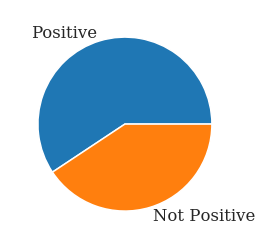

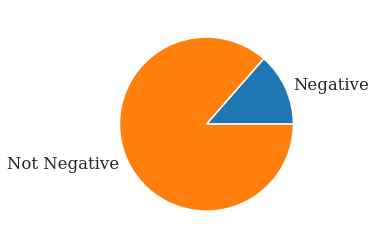

In [17]:
plt.pie([np.sum(df.PositiveLabel=='Positive'),np.sum(df.PositiveLabel=='NotPositive')],
        labels=['Positive', 'Not Positive'])
plt.show()
plt.pie([np.sum(df.NegativeLabel=='Negative'),np.sum(df.NegativeLabel=='NotNegative')],
        labels=['Negative', 'Not Negative'])
plt.show()